In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [25]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
gender_data = pd.read_csv("gender_submission.csv")

In [60]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [31]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [34]:
test_data_merged = pd.merge(test_data,gender_data, on="PassengerId")

In [35]:
def concat_df(train_data, test_data_merged):
    return pd.concat([train_data, test_data_merged]).reset_index(drop=True)
df = concat_df(train_data, test_data_merged)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [41]:
print("Train Data")
print("Rows: " + str(len(train_data)))
print("Column: " + str(len(train_data.columns)))
print("="*15)
print("Test Data")
print("Rows: " + str(len(test_data)))
print("Column: " + str(len(test_data.columns)))
print("="*15)
print("Data Combined")
print("Rows: " + str(len(df)))
print("Column: " + str(len(df.columns)))

Train Data
Rows: 891
Column: 12
Test Data
Rows: 418
Column: 11
Data Combined
Rows: 1309
Column: 12


Test Data donot contain Survived Column

In [42]:
print("Train Data Missing Data")
display(train_data.isnull().sum())
print("="*20)
print("Test Data Missing Data")
display(test_data.isnull().sum())
print("="*20)
print("Combined Data Missing Data")
display(df.isnull().sum())

Train Data Missing Data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test Data Missing Data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Combined Data Missing Data


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Data Cleaning

In [43]:
y_target = df['Survived']
x_train = df[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked', 'Ticket']]

In [44]:
def non_numerical_data(df):
    
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))

    return df

In [45]:
x_train = non_numerical_data(x_train)
x_train.head()

<ipython-input-44-8c73e369a357>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = list(map(convert_to_int,df[column]))


,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3,22.0,1,1,0,7.2500,2,461
1,1,38.0,0,1,0,71.2833,3,25
2,3,26.0,0,0,0,7.9250,2,692
3,1,35.0,0,1,0,53.1000,2,240
4,3,35.0,1,0,0,8.0500,2,429


In [46]:
fare = pd.DataFrame(x_train['Fare'])
# Normalizing
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
x_train['Fare'] = newfare
x_train

<ipython-input-46-7731635fa139>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Fare'] = newfare


,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3,22.0,1,1,0,0.014151,2,461
1,1,38.0,0,1,0,0.139136,3,25
2,3,26.0,0,0,0,0.015469,2,692
3,1,35.0,0,1,0,0.103644,2,240
4,3,35.0,1,0,0,0.015713,2,429
...,...,...,...,...,...,...,...,...
1304,3,NaN,1,0,0,0.015713,2,339
1305,1,39.0,0,0,0,0.212559,3,914
1306,3,38.5,1,0,0,0.014151,2,748
1307,3,NaN,1,0,0,0.015713,2,271


In [47]:
x_train.isnull().sum()

Pclass        0
Age         263
Sex           0
SibSp         0
Parch         0
Fare          1
Embarked      0
Ticket        0
dtype: int64

In [48]:
print("Missing Age in whole dataset: " + str(df["Age"].isnull().sum()))
print("Percentage: " + str(round(df["Age"].isnull().sum()/len(df)*100,0)) + "%")

Missing Age in whole dataset: 263
Percentage: 20.0%


C:\Users\chira\anaconda3\envs\work\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\chira\anaconda3\envs\work\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


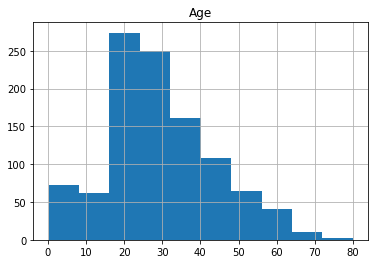

In [49]:
plt.title("Age")
plt.hist(df['Age'])
plt.grid()
plt.show()

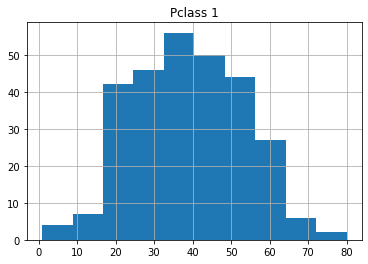

In [51]:
#plot 1:
plt.title("Pclass 1")
sp1 = df[(df['Pclass']==1)]
plt.hist(sp1['Age'])
plt.grid()
plt.show()

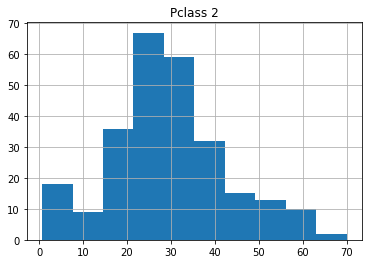

In [52]:
#plot 2:
plt.title("Pclass 2")
sp2 = df[(df['Pclass']==2)]
plt.hist(sp2['Age'])
plt.grid()
plt.show()

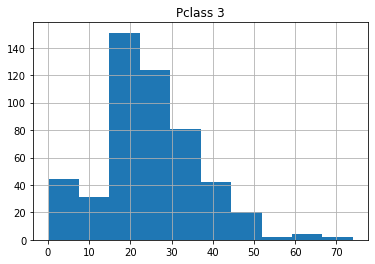

In [54]:
#plot 3:
plt.title("Pclass 3")
sp3 = df[(df['Pclass']==3)]
plt.hist(sp3['Age'])
plt.grid()
plt.show()

Fill the NAN values with the median values in the datasets

In [55]:
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())
print("Number of NULL values" , x_train['Age'].isnull().sum())
print(x_train.head(3))

Number of NULL values 0
   Pclass   Age  Sex  SibSp  Parch      Fare  Embarked  Ticket
0       3  22.0    1      1      0  0.014151         2     461
1       1  38.0    0      1      0  0.139136         3      25
2       3  26.0    0      0      0  0.015469         2     692


<ipython-input-55-4571b40c8763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())


In [84]:
x_train['Fare'] = x_train['Fare'].fillna(x_train['Fare'].mean())
print("Number of NULL values" , x_train['Fare'].isnull().sum())
print(x_train.head(3))

Number of NULL values 0
   Pclass   Age  Sex  SibSp  Parch      Fare  Embarked  Ticket
0       3  22.0    1      1      0  0.014151         2     461
1       1  38.0    0      1      0  0.139136         3      25
2       3  26.0    0      0      0  0.015469         2     692


<ipython-input-84-d4adf14af5ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Fare'] = x_train['Fare'].fillna(x_train['Fare'].mean())


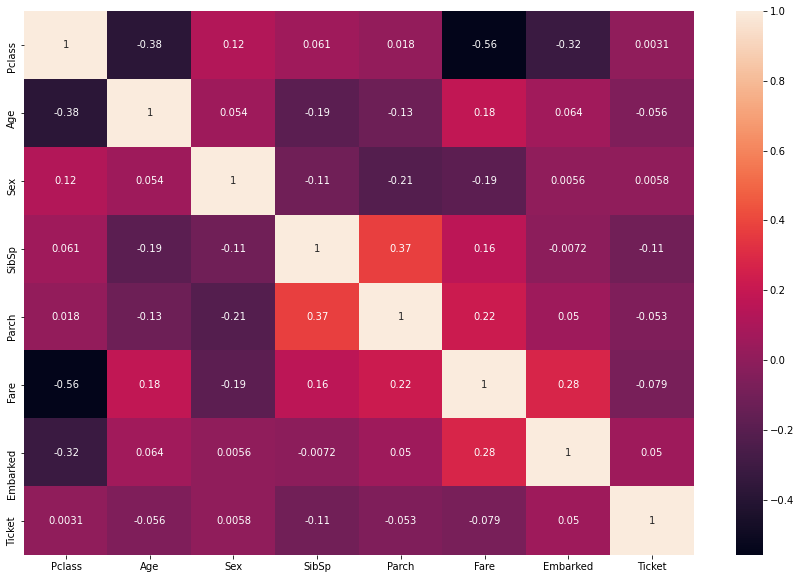

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(),annot=True)

In [86]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Age       1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   int64  
 7   Ticket    1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_target, test_size = 0.2, random_state = 100)

In [89]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [91]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       167
           1       0.87      0.79      0.83        95

    accuracy                           0.88       262
   macro avg       0.88      0.86      0.87       262
weighted avg       0.88      0.88      0.88       262



In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[156,  11],
       [ 20,  75]], dtype=int64)